# <center>**Desafio Cientista de Dados INDICIUM**</center>


## ***Preâmbulo***

In [20]:
# Importando as bibliotecas que serão utilizadas

# Importando a biblioteca pandas para manipulação de dados em DataFrames
import pandas as pd

# Importando a biblioteca numpy para operações numéricas e manipulação de arrays
import numpy as np

# Importando a biblioteca matplotlib.pyplot para visualização de dados em gráficos
import matplotlib.pyplot as plt

# Importando a biblioteca seaborn para visualização de dados com gráficos estatísticos melhorados
import seaborn as sns

# Importando a biblioteca pickle para serialização e desserialização de objetos Python
import pickle

# Importando o modelo de Regressão Linear da biblioteca scikit-learn
from sklearn.linear_model import LinearRegression

# Importando o modelo K-Nearest Neighbors (KNN) para regressão da biblioteca scikit-learn
from sklearn.neighbors import KNeighborsRegressor

# Importando o modelo Random Forest para regressão da biblioteca scikit-learn
from sklearn.ensemble import RandomForestRegressor

# Importando a função cross_val_score para realizar validação cruzada e avaliar modelos
from sklearn.model_selection import cross_val_score

# Importando o ColumnTransformer para aplicar transformações em colunas específicas de um DataFrame
from sklearn.compose import ColumnTransformer

# Importando OneHotEncoder para transformar variáveis categóricas em variáveis dummy (indicadoras)
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Importando make_pipeline para criar um pipeline que encadeia transformações de dados e modelos
from sklearn.pipeline import make_pipeline


In [21]:
# Lendo a base de dados
df = pd.read_csv('teste_indicium_precificacao.csv')

# Imprimindo os dados iniciais do dataframe (df)
display(df.head())

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


In [22]:
# df do apartamento que será utilizado no item 4 Supondo um apartamento com as seguintes características:

df_new = pd.DataFrame([
{'id': 2595,
'nome': 'Skylit Midtown Castle',
'host_id': 2845,
'host_name': 'Jennifer',
'bairro_group': 'Manhattan',
'bairro': 'Midtown',
'latitude': 40.75362,
'longitude': -73.98377,
'room_type': 'Entire home/apt',
'minimo_noites': 1,
'numero_de_reviews': 45,
'ultima_review': '2019-05-21',
'reviews_por_mes': 0.38,
'calculado_host_listings_count': 2,
'disponibilidade_365': 355}
])

In [23]:
# Pegando os 10 bairros mais frequentes
top_bairros = df['bairro'].value_counts().nlargest(10).index

# Criando uma coluna bairro_agrupado que informa os 10 bairros mais frequentes e os demais como 'Outros'
df['bairro_agrupado'] = df['bairro'].where(df['bairro'].isin(top_bairros), 'Outros')
df_new['bairro_agrupado'] = df_new['bairro'].where(df_new['bairro'].isin(top_bairros), 'Outros')

# Transformando a coluna 'ultima_review' de string para 'date'
df['ultima_review'] = pd.to_datetime(df['ultima_review'])
df_new['ultima_review'] = pd.to_datetime(df_new['ultima_review'])

# Criando uma coluna que ao invés de utilizar a data da última revisão, calcula os dias desde a última revisão que consta no df
df['dias_ultima_review'] = (max(df['ultima_review'])-df['ultima_review']).dt.days
df_new['dias_ultima_review'] = (max(df['ultima_review'])-df_new['ultima_review']).dt.days


## ***Análise exploratória dos dados (EDA)***

In [24]:
# Variáveis respostas que iremos analisar
y = df['price']
y_sqrt = np.sqrt(df['price'])
y_log = np.log(df['price']+1)

# Nome das variáveis explicativas que utilizaremos
variavel_resposta = 'price'
variaveis_explcativas = [
    'latitude',
    'longitude',
    'minimo_noites',
    'numero_de_reviews',
    'reviews_por_mes',
    'calculado_host_listings_count',
    'disponibilidade_365',
    'dias_ultima_review'
]

# Nome das variáveis explicativas entre categoria ou numérica
variaveis_numericas = ['latitude', 'longitude', 'minimo_noites', 'numero_de_reviews', 'reviews_por_mes', 
                        'calculado_host_listings_count', 'disponibilidade_365', 'dias_ultima_review']
variaveis_categoricas = ['bairro_group','bairro_agrupado','room_type']


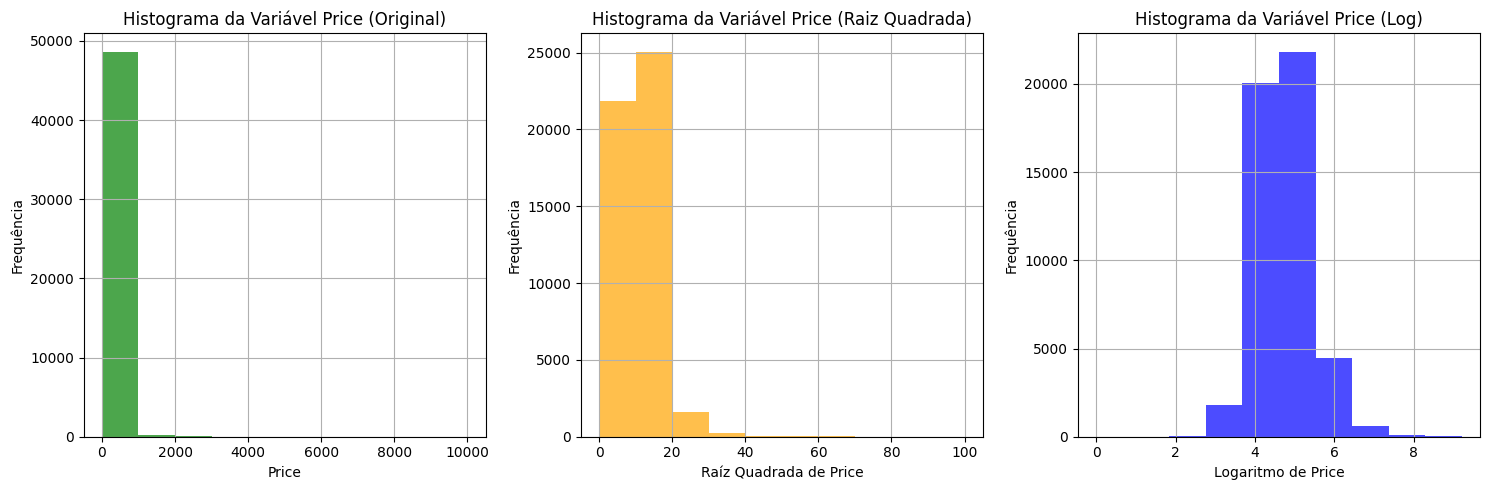

In [25]:
# Gráfico dos histogramas das variáveis respostas que iremos analisar
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Histograma da variável original
axs[0].hist(y, bins=10, alpha=0.7, color='green')
axs[0].set_title('Histograma da Variável Price (Original)')
axs[0].set_xlabel('Price')
axs[0].set_ylabel('Frequência')
axs[0].grid(True)

# Histograma da raiz quadrada
axs[1].hist(y_sqrt, bins=10, alpha=0.7, color='orange')
axs[1].set_title('Histograma da Variável Price (Raiz Quadrada)')
axs[1].set_xlabel('Raíz Quadrada de Price')
axs[1].set_ylabel('Frequência')
axs[1].grid(True)

# Histograma da variável logarítmica
axs[2].hist(y_log, bins=10, alpha=0.7, color='blue')
axs[2].set_title('Histograma da Variável Price (Log)')
axs[2].set_xlabel('Logaritmo de Price')
axs[2].set_ylabel('Frequência')
axs[2].grid(True)

plt.tight_layout()
plt.show()

Conforme podemos notar acima, a variável reposta 'price' tem uma alta assimetria à esquerda (histograma verde), nesse intuito aplicamos duas transformações: raiz quadrada (histrograma amarelo) e logaritma (histograma azul), para verificar se era possível obter uma simetria. Uma vez  com a varíavel simetrica é possível utilizar a teoria dos modelos paramétricos (como pro exemplo regressão linear) com resposta distribuição normal. Como opção vamos propor modelos tanto na variável resposta original quanto para variável resposta transformada na escala logaritma.


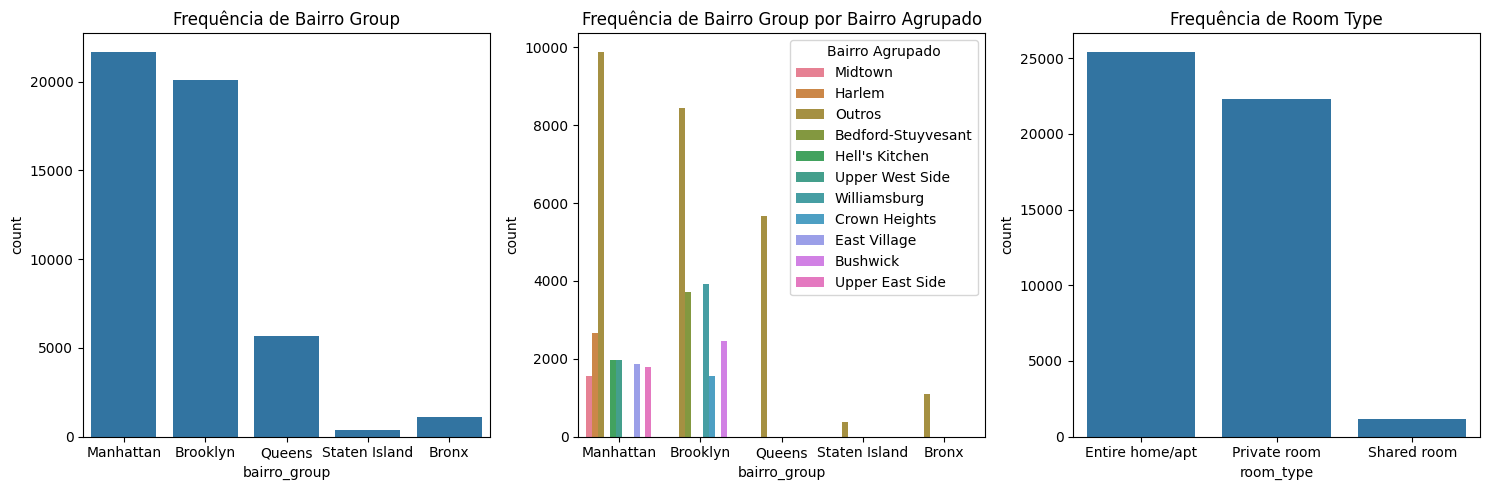

In [26]:
# Gráfico de barras das variáveis categoricas que iremos analisar
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Gráfico 1: Frequência de 'bairro_group'
sns.countplot(data=df, x='bairro_group', ax=axes[0])
axes[0].set_title('Frequência de Bairro Group')

# Gráfico 2: Frequência de 'bairro_group' por 'bairro_agrupado'
sns.countplot(data=df, x='bairro_group', hue='bairro_agrupado', ax=axes[1])
axes[1].set_title('Frequência de Bairro Group por Bairro Agrupado')
axes[1].legend(title='Bairro Agrupado')

# Gráfico 3: Frequência de 'room_type'
sns.countplot(data=df, x='room_type', ax=axes[2])
axes[2].set_title('Frequência de Room Type')

plt.tight_layout()
plt.show()

Pelo gráfico de barras da esquerda podemos notar que na variável 'bairro_group' há uma alta incidência das categorias 'Manhattan' e 'Brooklyn' e uma baixíssima incidêncdia da categoria 'Staten Island'. No gráfico de barras do centro, quando fazemos a segmentação pela variável criada 'Bairro Agrupado', notamos que em 'Manhattan' o bairro com maior oferta é 'Harlem' enquanto no 'Brooklyn' é o bairro 'Williamsburg'. Analisando a variável 'Room Type' (gráfico de barras da direita) notamos que as categorias 'Entire home/apt' e 'Private room' são as mais frequentes e há pouca oferta da categoria 'Shared room'.

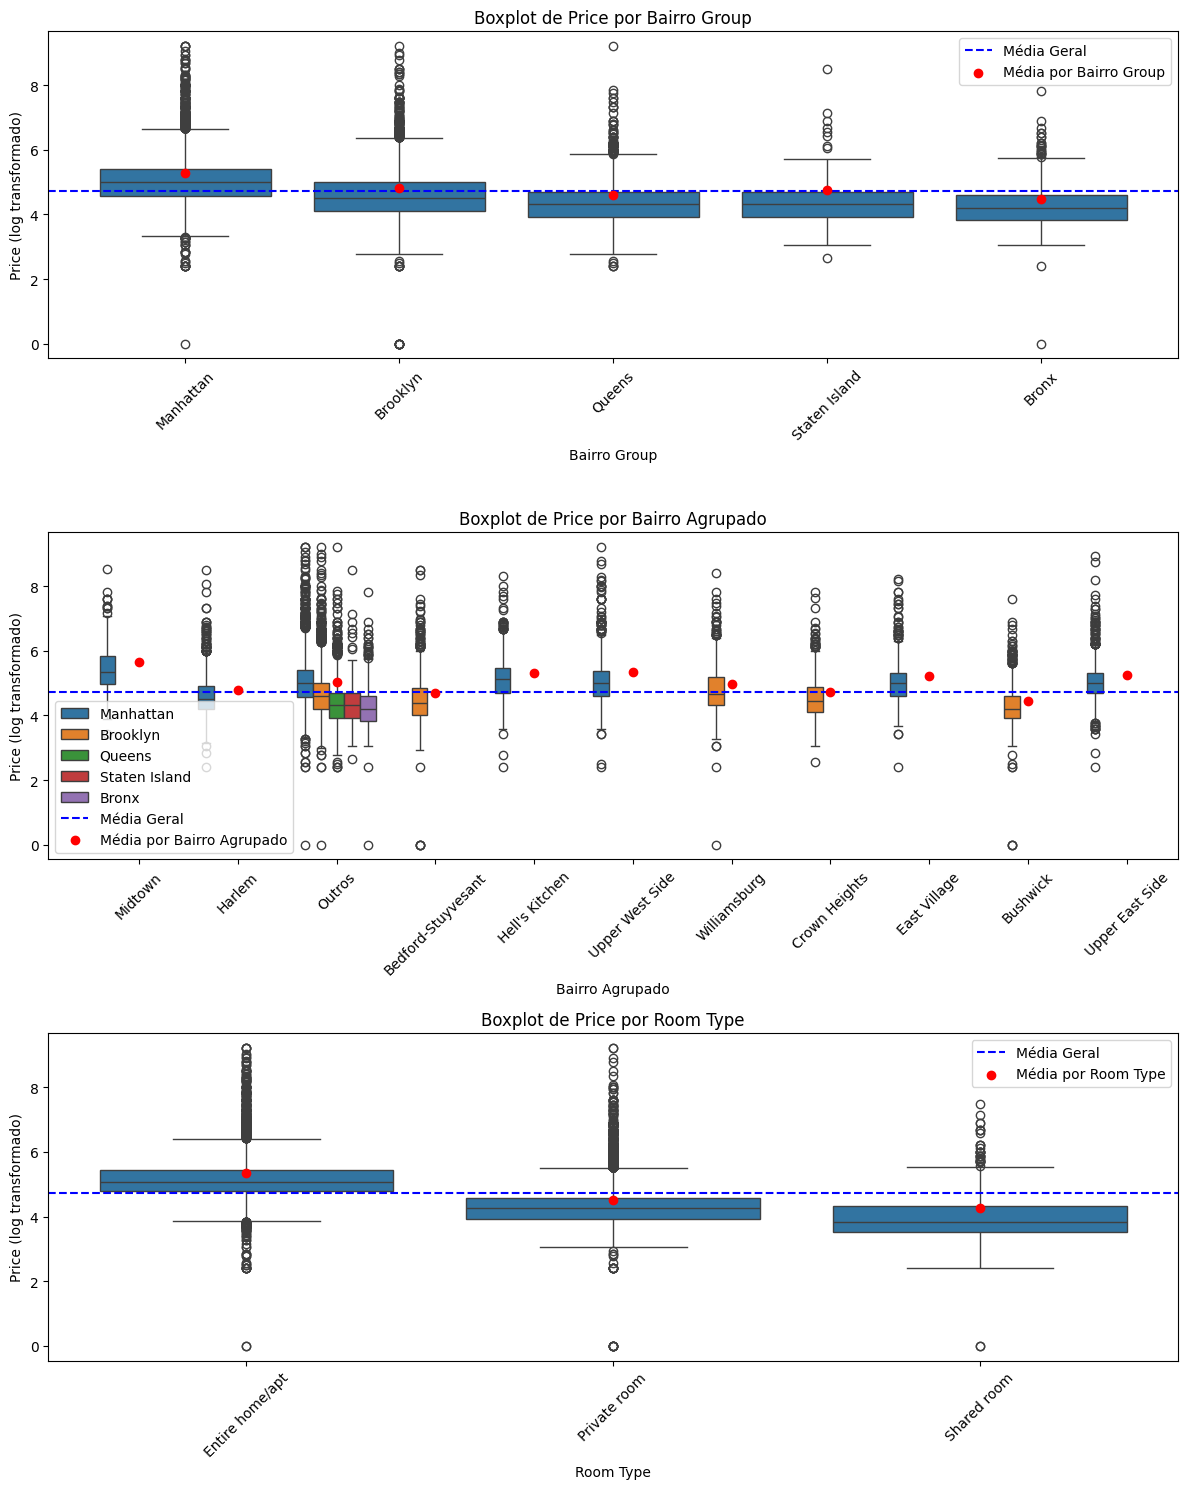

In [27]:
# Boxplots da variável resposta transformada (logaritmo) com as variáveis categóricas
fig, axes = plt.subplots(3, 1, figsize=(12, 15))

# Gráfico 1: Boxplot para bairro_group
sns.boxplot(x='bairro_group', y=y_log, data=df, ax=axes[0])
media_geral = y_log.mean()
media_por_bairro = df.groupby('bairro_group')['price'].mean()
media_por_bairro_log = np.log(media_por_bairro + 1)  # Log transformando a média

# Média geral como uma linha horizontal
axes[0].axhline(media_geral, color='blue', linestyle='--', label='Média Geral')
# Média de cada categoria como pontos no gráfico
axes[0].scatter(media_por_bairro.index, media_por_bairro_log, color='red', label='Média por Bairro Group', zorder=5)

axes[0].set_title('Boxplot de Price por Bairro Group')
axes[0].set_xlabel('Bairro Group')
axes[0].set_ylabel('Price (log transformado)')
axes[0].legend()
axes[0].tick_params(axis='x', rotation=45)

# Gráfico 2: Boxplot para bairro_agrupado
sns.boxplot(x='bairro_agrupado', y=y_log, hue = 'bairro_group', data=df, ax=axes[1])
media_geral_agrupado = y_log.mean()
media_por_bairro_agrupado = df.groupby('bairro_agrupado')['price'].mean()
media_por_bairro_agrupado_log = np.log(media_por_bairro_agrupado + 1)  # Log transformando a média

# Média geral como uma linha horizontal
axes[1].axhline(media_geral_agrupado, color='blue', linestyle='--', label='Média Geral')
# Média de cada categoria como pontos no gráfico
axes[1].scatter(media_por_bairro_agrupado.index, media_por_bairro_agrupado_log, color='red', label='Média por Bairro Agrupado', zorder=5)

axes[1].set_title('Boxplot de Price por Bairro Agrupado')
axes[1].set_xlabel('Bairro Agrupado')
axes[1].set_ylabel('Price (log transformado)')
axes[1].legend()
axes[1].tick_params(axis='x', rotation=45)

# Gráfico 3: Boxplot para room_type
sns.boxplot(x='room_type', y=y_log, data=df, ax=axes[2])
media_geral_agrupado = y_log.mean()
media_por_room_type = df.groupby('room_type')['price'].mean()
media_por_room_type_log = np.log(media_por_room_type + 1)  # Log transformando a média

# Média geral como uma linha horizontal
axes[2].axhline(media_geral_agrupado, color='blue', linestyle='--', label='Média Geral')
# Média de cada categoria como pontos no gráfico
axes[2].scatter(media_por_room_type.index, media_por_room_type_log, color='red', label='Média por Room Type', zorder=5)

axes[2].set_title('Boxplot de Price por Room Type')
axes[2].set_xlabel('Room Type')
axes[2].set_ylabel('Price (log transformado)')
axes[2].legend()
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

Podemos notar que os 'bairro_group': 'Manhattan' e 'Brooklyn' são os que têm os maiores valores da variável reposta, acompanhados por 'Staten Island', suas médias estão acima da média geral. Enquanto o 'Bronx' é o que tem menor valor da variável resposta. Algo já esperado pelo nosso conhecimento prévio sobre a cidade de 'New York'.

Fazendo uma análise dentro de cada 'bairro_group' percebemos que 'Midtown' é o bairro com maior 'price' em 'Manhattan' enquanto 'Williamsburg' é o que tem maior valor de 'Price' no 'Brooklyn'.

Observando a varíavel 'Room Type' notamos que a categoria 'Entire home/apt' é a que tem o maior valor da variável resposta 'Price'.

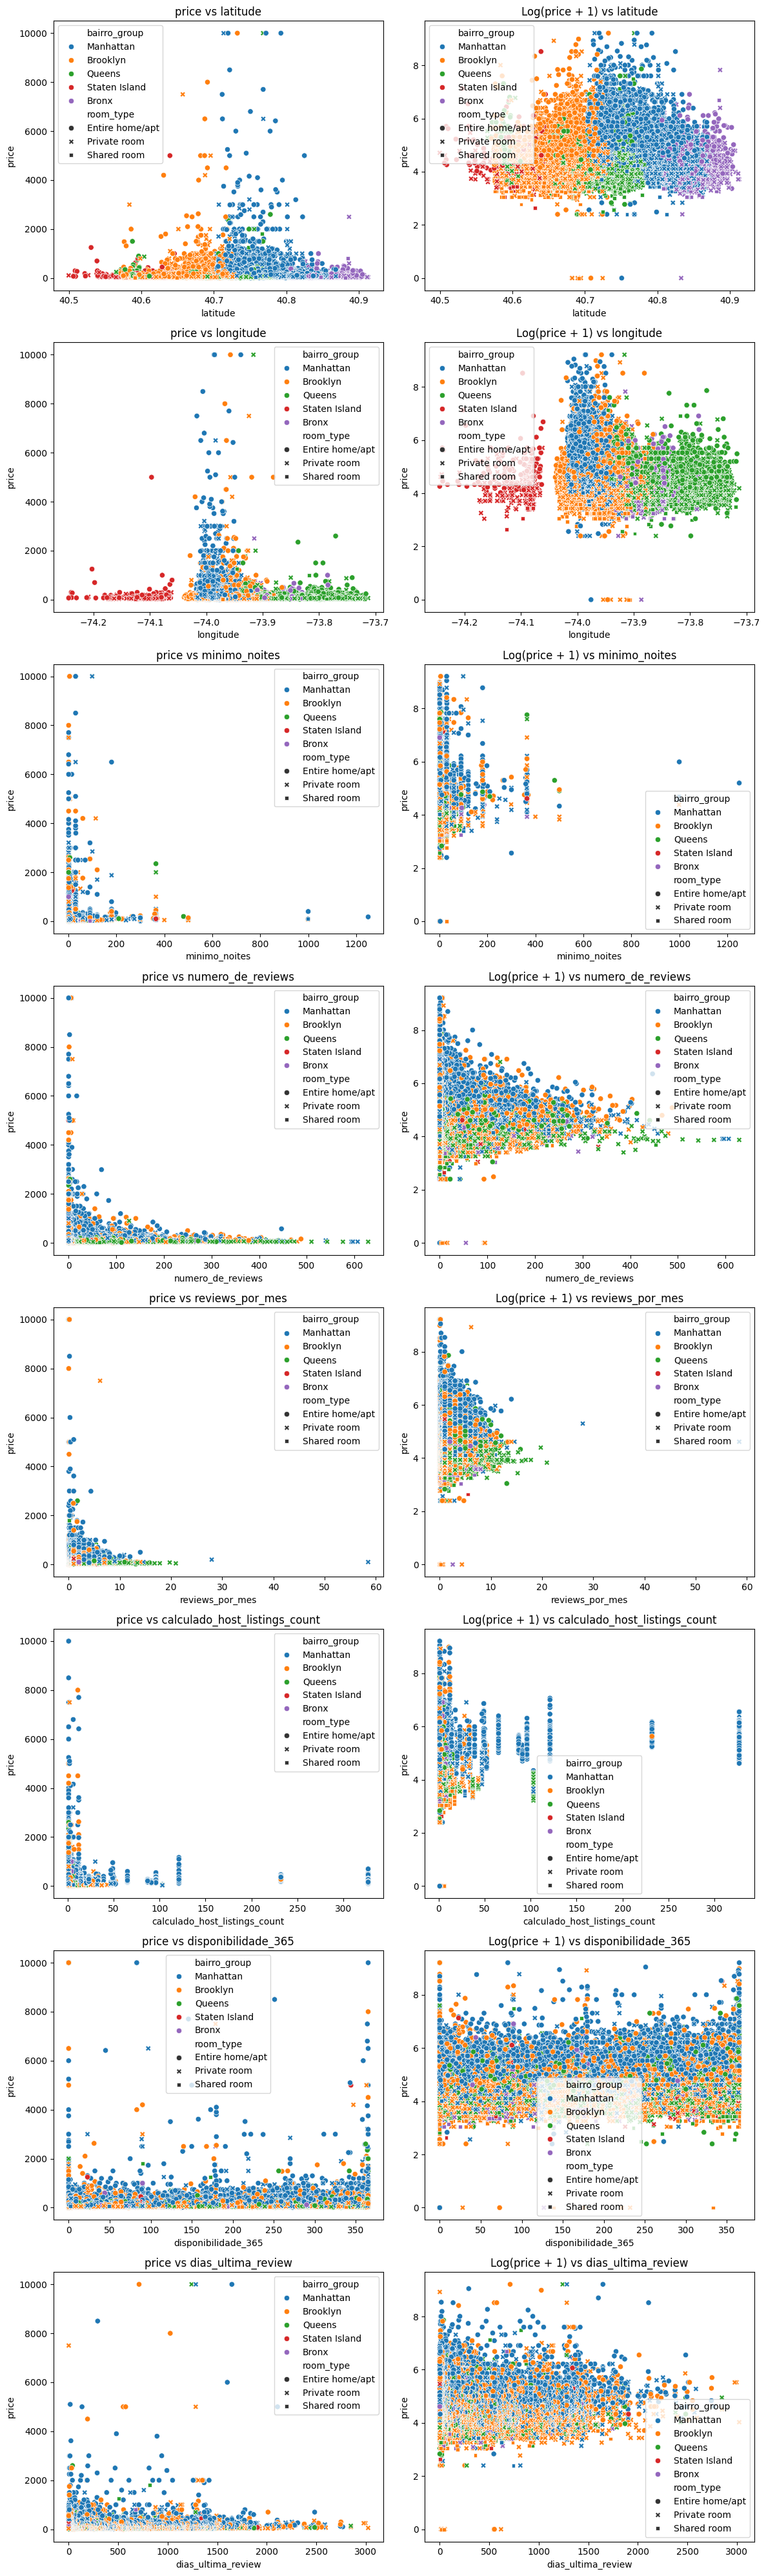

In [28]:
# Gráficos de dispersão das variáveis numéricas explicativas com a variável resposta tanto original quando na escala
# logaritma
fig, axes = plt.subplots(8, 2, figsize=(12, 40))

# Plotando os gráficos para 'price'
for i, variavel in enumerate(variaveis_explcativas):
    sns.scatterplot(data=df, y=variavel_resposta, x=variavel, hue="bairro_group", style="room_type", ax=axes[i, 0])
    axes[i, 0].set_title(f'{variavel_resposta} vs {variavel}')

# Plotando os gráficos para log de 'price'
for i, variavel in enumerate(variaveis_explcativas):
    sns.scatterplot(data=df, y=np.log(df[variavel_resposta] + 1), x=variavel, hue="bairro_group", style="room_type", ax=axes[i, 1])
    axes[i, 1].set_title(f'Log({variavel_resposta} + 1) vs {variavel}')
    
plt.tight_layout()
plt.show()

Alguns padrões são perceptíveis analisando os gráficos. A saber:

1. Considerando as variáveis 'latitude' e 'longitude' os 'bairro_groups': 'Manhattan' e 'Brooklyn', que apresentam as maiores ofertas e com os maiores 'Price', são próximos, o qual explica o 'Price' semelhante.

2. Em relação a variável 'minimo_noites' nota-se que quanto menos noites o usuário reserva, maior é o preço da diária.

3. Padrões semelhantes se observam nas variáveis 'numero_de_reviews', 'reviews_por_mes' e 'calculado_host_listings_count', ou seja, quanto menos comentários maior o preço da diária, quanto menos números de avaliações maior o preço da diária e quanto menor a quantidade de listagem por host maior o preço por noite, respectivamente.

4. Sob as variáveis 'disponibilidade_365' e 'dias_ultima_review' não existe um padrão tão evidente de relação com preço por noite. Nota-se para 'dias_ultima_review' uma leve maior presença de preços maiores para os valores menores que 1500. Isto responde à segunda pergunta do teste que questiona se o número mínimo de noites e a disponibilidade ao longo do ano interferem no preço.



## ***Respostas das perguntas parte EDA***

1. Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?

   Pois bem, levando em consideração as observações do tópico anterior aplicamos alguns filtros e abaixo temos uma amostra dos dados que apresentam um maior valor por diária que pode ser uma sugestão para caso alguém queira investir um um imóvel para locação.


In [29]:
filtro = (df['bairro_group']=='Manhattan') & (df['room_type'] == 'Entire home/apt') & (df['bairro_agrupado']=='Midtown') & (df['minimo_noites']<100)&(df['numero_de_reviews']<50) &(df['reviews_por_mes']<5)&(df['calculado_host_listings_count']<25)&(df['dias_ultima_review']<1500)
#&(df['disponibilidade_365']>350)

df_filtrado = df[filtro]

In [30]:
display(df_filtrado.head())

,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365,bairro_agrupado,dias_ultima_review
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355,Midtown,48.0
381,114969,"Manhattan Studio, Perfect Location",582598,Andrey,Manhattan,Midtown,40.75579,-73.96699,Entire home/apt,145,6,39,2018-09-24,0.40,1,0,Midtown,287.0
593,225297,Quiet sunny studio Midtown,1173599,Gaya,Manhattan,Midtown,40.74267,-73.98569,Entire home/apt,125,4,3,2018-12-26,0.03,1,0,Midtown,194.0
901,328040,"Awesome views, Central location",1676487,Robyn,Manhattan,Midtown,40.75023,-73.98293,Entire home/apt,299,10,19,2019-06-11,0.27,1,101,Midtown,27.0
940,357509,Manhattan - Best Location in Midtown,684129,Ellie,Manhattan,Midtown,40.75407,-73.96713,Entire home/apt,110,7,27,2019-03-01,0.31,1,192,Midtown,129.0


2. O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

   Como discutido antes, observa-se nos gráficos de dispersão de 'price vs disponibilidade_365' e de 'price vs dias_ultima_review', dados acima, que sob as variáveis 'disponibilidade_365' e 'dias_ultima_review' não existe um padrão tão evidente de relação com preço por noite. Nota-se para 'dias_ultima_review' uma leve maior presença de preços maiores para os valores menores que 1500.  

3. Existe algum padrão no texto do nome do local para lugares de mais alto valor?

   Realizando uma abordagem simples e superficial de processamento de linguagem natural (PLN) (código encontrado abaixo) podemos notar que os termos:  'Midtown', 'Studio', 'Manhattan', 'Luxury', 'Spacious', 'Bedroom', 'Apartment', 'Central Park', 'Empire State', 'Cozy', 'Wyndham', 'Morden' são os mais frequente no cenário que temos interesse.


In [31]:
# Obtendo os termos mais frequentes

palavras = df_filtrado['nome'].str.split()

palavras_explodidas = palavras.explode()

termos_frequentes = palavras_explodidas.value_counts()

print(termos_frequentes)

nome
Midtown        147
in             115
Studio          98
Manhattan       73
1               48
              ... 
☆                1
Attractions      1
Major            1
Minutes          1
Laundry          1
Name: count, Length: 965, dtype: int64


## ***Previsão e Resposta às Perguntas***

A previsão do preço pode ser feita a partir do ajuste (e posterior previsão) de um modelo de maching learning. Como a variável resposta é contínua, estamos tratando com um problema de regressão. Logo, consideraremos tres modelos amplamente conhecidos, a saber: Regressão Linear, KNN (K-vizinhos mais próximos) e Random Forest. Faremos o respectivo ajuste para cada um deles tanto para a variável resposta na escala original como para a variável resposta na escala logaritmica.



Vamos utilizar a biblioteca 'scikit-learn' para realizar os ajustes dos modelos e previsão.
Começamos fazendo algumas transformaçoes necessárias: como a transformação das variáves categóricas ('bairro_group','bairro_agrupado','room_type') em variáves numéricas por meio do método One Hot Encoding, isto devido a que alguns modelos não aceitam variáveis categóricas (como é o caso do modelo de Regressão Linear, por exemplo). E também a padronizacão das variáves numéricas, já que pela variadade da suas magnitutes a transformação garante que nenhuma variável tenha influência excessiva no modelo. 

In [32]:
# Alguns processamentos e tranformações para o ajuste do modelo e previsão

X = df[variaveis_numericas + variaveis_categoricas]
X = X.fillna(0)

X_new = df_new[variaveis_numericas + variaveis_categoricas]
X_new = X_new.fillna(0)

# Processador do modelo
preprocessor = ColumnTransformer(
        transformers=[
            ('cat', OneHotEncoder(drop='first'), variaveis_categoricas),  # Corrigido: 'cat' para categorical
            ('num', StandardScaler(), variaveis_numericas)  # Corrigido: 'num' para numeric
        ],
        remainder='passthrough'  
    )
make_pipeline(preprocessor, LinearRegression()),
make_pipeline(preprocessor, KNeighborsRegressor(n_neighbors=5)),
make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100)),

# Construindo os  pipelines para os modelos
pipeline_linear = make_pipeline(preprocessor, LinearRegression())
pipeline_knn = make_pipeline(preprocessor, KNeighborsRegressor(n_neighbors=5))
pipeline_rf = make_pipeline(preprocessor, RandomForestRegressor(n_estimators=100))

# Número de validações cruzada
k=10

Após realizar a preparação do 'df' para ajustar os modelos e definir alguns parâmetros vamos realizar uma validação cruzada com 10 'folds' considerando os modelos de regressão linear simples, k-vizinhos mais próximos (k=5) e random forest.

In [33]:
# Validação cruzada para a variável reposta na escala original

scores_linear_y = cross_val_score(pipeline_linear, X, y, cv=k, scoring='neg_mean_squared_error')
scores_knn_y = cross_val_score(pipeline_knn, X, y, cv=k, scoring='neg_mean_squared_error')
scores_rf_y = cross_val_score(pipeline_rf, X, y, cv=k, scoring='neg_mean_squared_error')

rmse_linear_y = np.sqrt(-scores_linear_y)
rmse_knn_y = np.sqrt(-scores_knn_y)
rmse_rf_y = np.sqrt(-scores_rf_y)

print(f"RMSE da Regressão Linear: {rmse_linear_y.mean()} ± {rmse_linear_y.std()}")
print(f"RMSE do KNN: {rmse_knn_y.mean()} ± {rmse_knn_y.std()}")
print(f"RMSE da Random Forest: {rmse_rf_y.mean()} ± {rmse_rf_y.std()}")

RMSE da Regressão Linear: 225.0350784806646 ± 34.68578751359703
RMSE do KNN: 238.85720020039184 ± 41.237157864128015
RMSE da Random Forest: 229.2455005762034 ± 41.80372101137339


In [34]:
# Validação cruzada para a variável reposta na escala logarítmica

scores_linear_y_log = cross_val_score(pipeline_linear, X, y_log, cv=k, scoring='neg_mean_squared_error')
scores_knn_y_log = cross_val_score(pipeline_knn, X, y_log, cv=k, scoring='neg_mean_squared_error')
scores_rf_y_log = cross_val_score(pipeline_rf, X, y_log, cv=k, scoring='neg_mean_squared_error')

rmse_linear_y_log = np.sqrt(-scores_linear_y_log)
rmse_knn_y_log = np.sqrt(-scores_knn_y_log)
rmse_rf_y_log = np.sqrt(-scores_rf_y_log)

print(f"RMSE da Regressão Linear: {rmse_linear_y_log.mean()} ± {rmse_linear_y_log.std()}")
print(f"RMSE do KNN: {rmse_knn_y_log.mean()} ± {rmse_knn_y_log.std()}")
print(f"RMSE da Random Forest: {rmse_rf_y_log.mean()} ± {rmse_rf_y_log.std()}")


RMSE da Regressão Linear: 0.4891033230812223 ± 0.023609838324008033
RMSE do KNN: 0.5016772610106197 ± 0.03131324454681794
RMSE da Random Forest: 0.4581547227313176 ± 0.031054089812740396


In [35]:
print(f"Comparação dos RMSE: Melhor modelo na escala original (o modelo de Regressão Linear) teve {round(rmse_linear_y.mean(),4)} de RMSE e o melhor modelo na escala logaritma (O Random Forest) tranformando na escala orignal teve {round(np.exp(rmse_rf_y_log.mean())-1,4)} de RMSE")

Comparação dos RMSE: Melhor modelo na escala original (o modelo de Regressão Linear) teve 225.0351 de RMSE e o melhor modelo na escala logaritma (O Random Forest) tranformando na escala orignal teve 0.5812 de RMSE


Usamos como medida de performance o RMSE (a raiz quadrada do erro quadrático médio) porque, entre outros, mantém a mesma unidade da variável resposta, dá mais peso a erros grandes e é mais fácil de interpretar em relação ao MSE (Erro Quadrático Médio).
Logo, analisando os resultados e utilizando como métrica de selação o RMSE  obtemos que o modelo de Regressão Linear é o melhor quando realizamos o ajuste para a variável 'price' na escala original, enquanto que quando utilizamos a variável resposta na escala logarítma o modelo Random Forest é o que apresenta o melhor resultado. 
Observação: em ambos os casos cada modelo tem vantagens e desvantagens. Por exemplo, no melhor modelo na escala original (ou seja o modelo de Regressão Linear) temos que embora seja um modelo simples e de fácil interpretabilidade, é altamente sensível à presença de outliers e se duas ou mais variáveis explicativas estiverem altamente correlacionadas o modelo pode sofrer com multicolinearidade.
Por outro lado, no melhor modelo na escala logarítmica (ou seja o modelo Random Forest) reduz-se overfitting ao combinar multiplas árvores de decisão e ao fazer uma média das previsões. Porém, essa misma combinação de múltiplas árvores de decisão impossibilita uma fácil interpretabilidade, além de torna-lo mais lento e computacionalmente custoso.


Finalmente, apresentamos a previsão de preço para o apartamento com as características que foram dadas no teste:

In [36]:
# Previsão na escala original

y_pred_linear = pipeline_linear.fit(X, y).predict(X_new)
print(f"Valor estimado por noite: U$ {np.round(y_pred_linear[0])} ")

Valor estimado por noite: U$ 353.0 


In [37]:
# Previsão na escala logarítma

y_log_pred_rf = pipeline_rf.fit(X, y_log).predict(X_new)
print(f"Valor estimado por noite: U$ {np.round(np.exp(y_log_pred_rf[0])-1)} ")

Valor estimado por noite: U$ 243.0 


Conclusão: Como o modelo Random Forest apresenta a melhor acurácia, é então o modelo escolhido para fins de estimação.

A seguir a exportação do modelo

In [38]:
# Salvar o modelo em um arquivo .pkl
with open('modelo_rf.pkl', 'wb') as arquivo:
    pickle.dump(pipeline_rf.fit(X, y_log), arquivo)